## Transforming agriculture through data science and remote sensing: Modeling agricultural activity status and generating agricultural statistics.

This notebook presents a data science and remote sensing project that leverages satellite imagery to analyze agricultural activity status and generate automated agricultural statistics. Agriculture plays a crucial role in the economy and society by providing food and raw materials for industries. However, obtaining accurate and up-to-date agricultural statistics can be challenging due to the costly and time-consuming nature of field data collection. To address this issue, a data science and remote sensing project was developed, utilizing satellite images to analyze agricultural activity status and automate statistical generation. This approach enables precise and current information without the need for constant field data collection, leading to significant cost reductions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
ag_data = pd.read_csv("C:/Users/robme/OneDrive/Escritorio/Carpeta-EntornoTrabajo-Git/Agricultural Activity Status/data_sentinel.csv")
ag_data = ag_data.rename(columns={'MES': 'MONTH', 'SEMBRADO': 'PLANTING', 'PREPARADO': 'PREPARATION', 'HUMEDAD': 'HUMIDITY'})
ag_data.head()

,OBJECTID,MONTH,PLANTING,PREPARATION,SV,POINT_X,POINT_Y,B3,B4,B8,B11,NDVI,NDMI,STATUS,HUMIDITY,TEMPERATUR,HUM_ORD,TEMP_ORD,MES_ORD,STATUS_ORD
0,445,ENERO,1,0,0,-100.275529,20.749692,1153.491667,940.541667,4228.416667,1525.058333,0.677746,0.450638,SEMBRADO,BAJA,BAJA,1,3,1,3.0
1,446,ENERO,1,0,0,-100.294862,20.717644,1142.750000,928.266667,4371.650000,1409.091667,0.685861,0.513720,SEMBRADO,BAJA,BAJA,1,3,1,3.0
2,447,ENERO,1,0,0,-100.298974,20.723573,1274.166667,1255.933333,3181.716667,1931.775000,0.405492,0.178517,SEMBRADO,BAJA,BAJA,1,3,1,3.0
3,448,ENERO,1,0,0,-100.300402,20.719290,1304.316667,1252.425000,3591.016667,1926.808333,0.463587,0.250436,SEMBRADO,BAJA,BAJA,1,3,1,3.0
4,449,ENERO,1,0,0,-100.337008,20.741448,1258.975000,1029.850000,4308.633333,1512.483333,0.706512,0.483229,SEMBRADO,BAJA,BAJA,1,3,1,3.0


In [3]:
ag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     1332 non-null   int64  
 1   MONTH        1332 non-null   object 
 2   PLANTING     1332 non-null   int64  
 3   PREPARATION  1332 non-null   int64  
 4   SV           1332 non-null   int64  
 5   POINT_X      1332 non-null   float64
 6   POINT_Y      1332 non-null   float64
 7   B3           1332 non-null   float64
 8   B4           1332 non-null   float64
 9   B8           1332 non-null   float64
 10  B11          1332 non-null   float64
 11  NDVI         1332 non-null   float64
 12  NDMI         1332 non-null   float64
 13  STATUS       1314 non-null   object 
 14  HUMIDITY     1332 non-null   object 
 15  TEMPERATUR   1332 non-null   object 
 16  HUM_ORD      1332 non-null   int64  
 17  TEMP_ORD     1332 non-null   int64  
 18  MES_ORD      1332 non-null   int64  
 19  STATUS

In [4]:
# We will make a copy of the original dataframe
ag_data_i = ag_data.copy()

# Counting null values
ag_data.isnull().sum()

OBJECTID        0
MONTH           0
PLANTING        0
PREPARATION     0
SV              0
POINT_X         0
POINT_Y         0
B3              0
B4              0
B8              0
B11             0
NDVI            0
NDMI            0
STATUS         18
HUMIDITY        0
TEMPERATUR      0
HUM_ORD         0
TEMP_ORD        0
MES_ORD         0
STATUS_ORD     18
dtype: int64

# 1.- Data Cleaning

In [5]:
ag_data = ag_data.drop_duplicates()
ag_data.shape

(1332, 20)

In [6]:
ag_data = ag_data.dropna()
ag_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1331
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     1314 non-null   int64  
 1   MONTH        1314 non-null   object 
 2   PLANTING     1314 non-null   int64  
 3   PREPARATION  1314 non-null   int64  
 4   SV           1314 non-null   int64  
 5   POINT_X      1314 non-null   float64
 6   POINT_Y      1314 non-null   float64
 7   B3           1314 non-null   float64
 8   B4           1314 non-null   float64
 9   B8           1314 non-null   float64
 10  B11          1314 non-null   float64
 11  NDVI         1314 non-null   float64
 12  NDMI         1314 non-null   float64
 13  STATUS       1314 non-null   object 
 14  HUMIDITY     1314 non-null   object 
 15  TEMPERATUR   1314 non-null   object 
 16  HUM_ORD      1314 non-null   int64  
 17  TEMP_ORD     1314 non-null   int64  
 18  MES_ORD      1314 non-null   int64  
 19  STATUS_ORD 

In [7]:
# Checking cleanliness
ag_data.isnull().sum()

OBJECTID       0
MONTH          0
PLANTING       0
PREPARATION    0
SV             0
POINT_X        0
POINT_Y        0
B3             0
B4             0
B8             0
B11            0
NDVI           0
NDMI           0
STATUS         0
HUMIDITY       0
TEMPERATUR     0
HUM_ORD        0
TEMP_ORD       0
MES_ORD        0
STATUS_ORD     0
dtype: int64

# 2.- EDA

Distribution of the different bands and indices in relation to the agricultural activity status

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

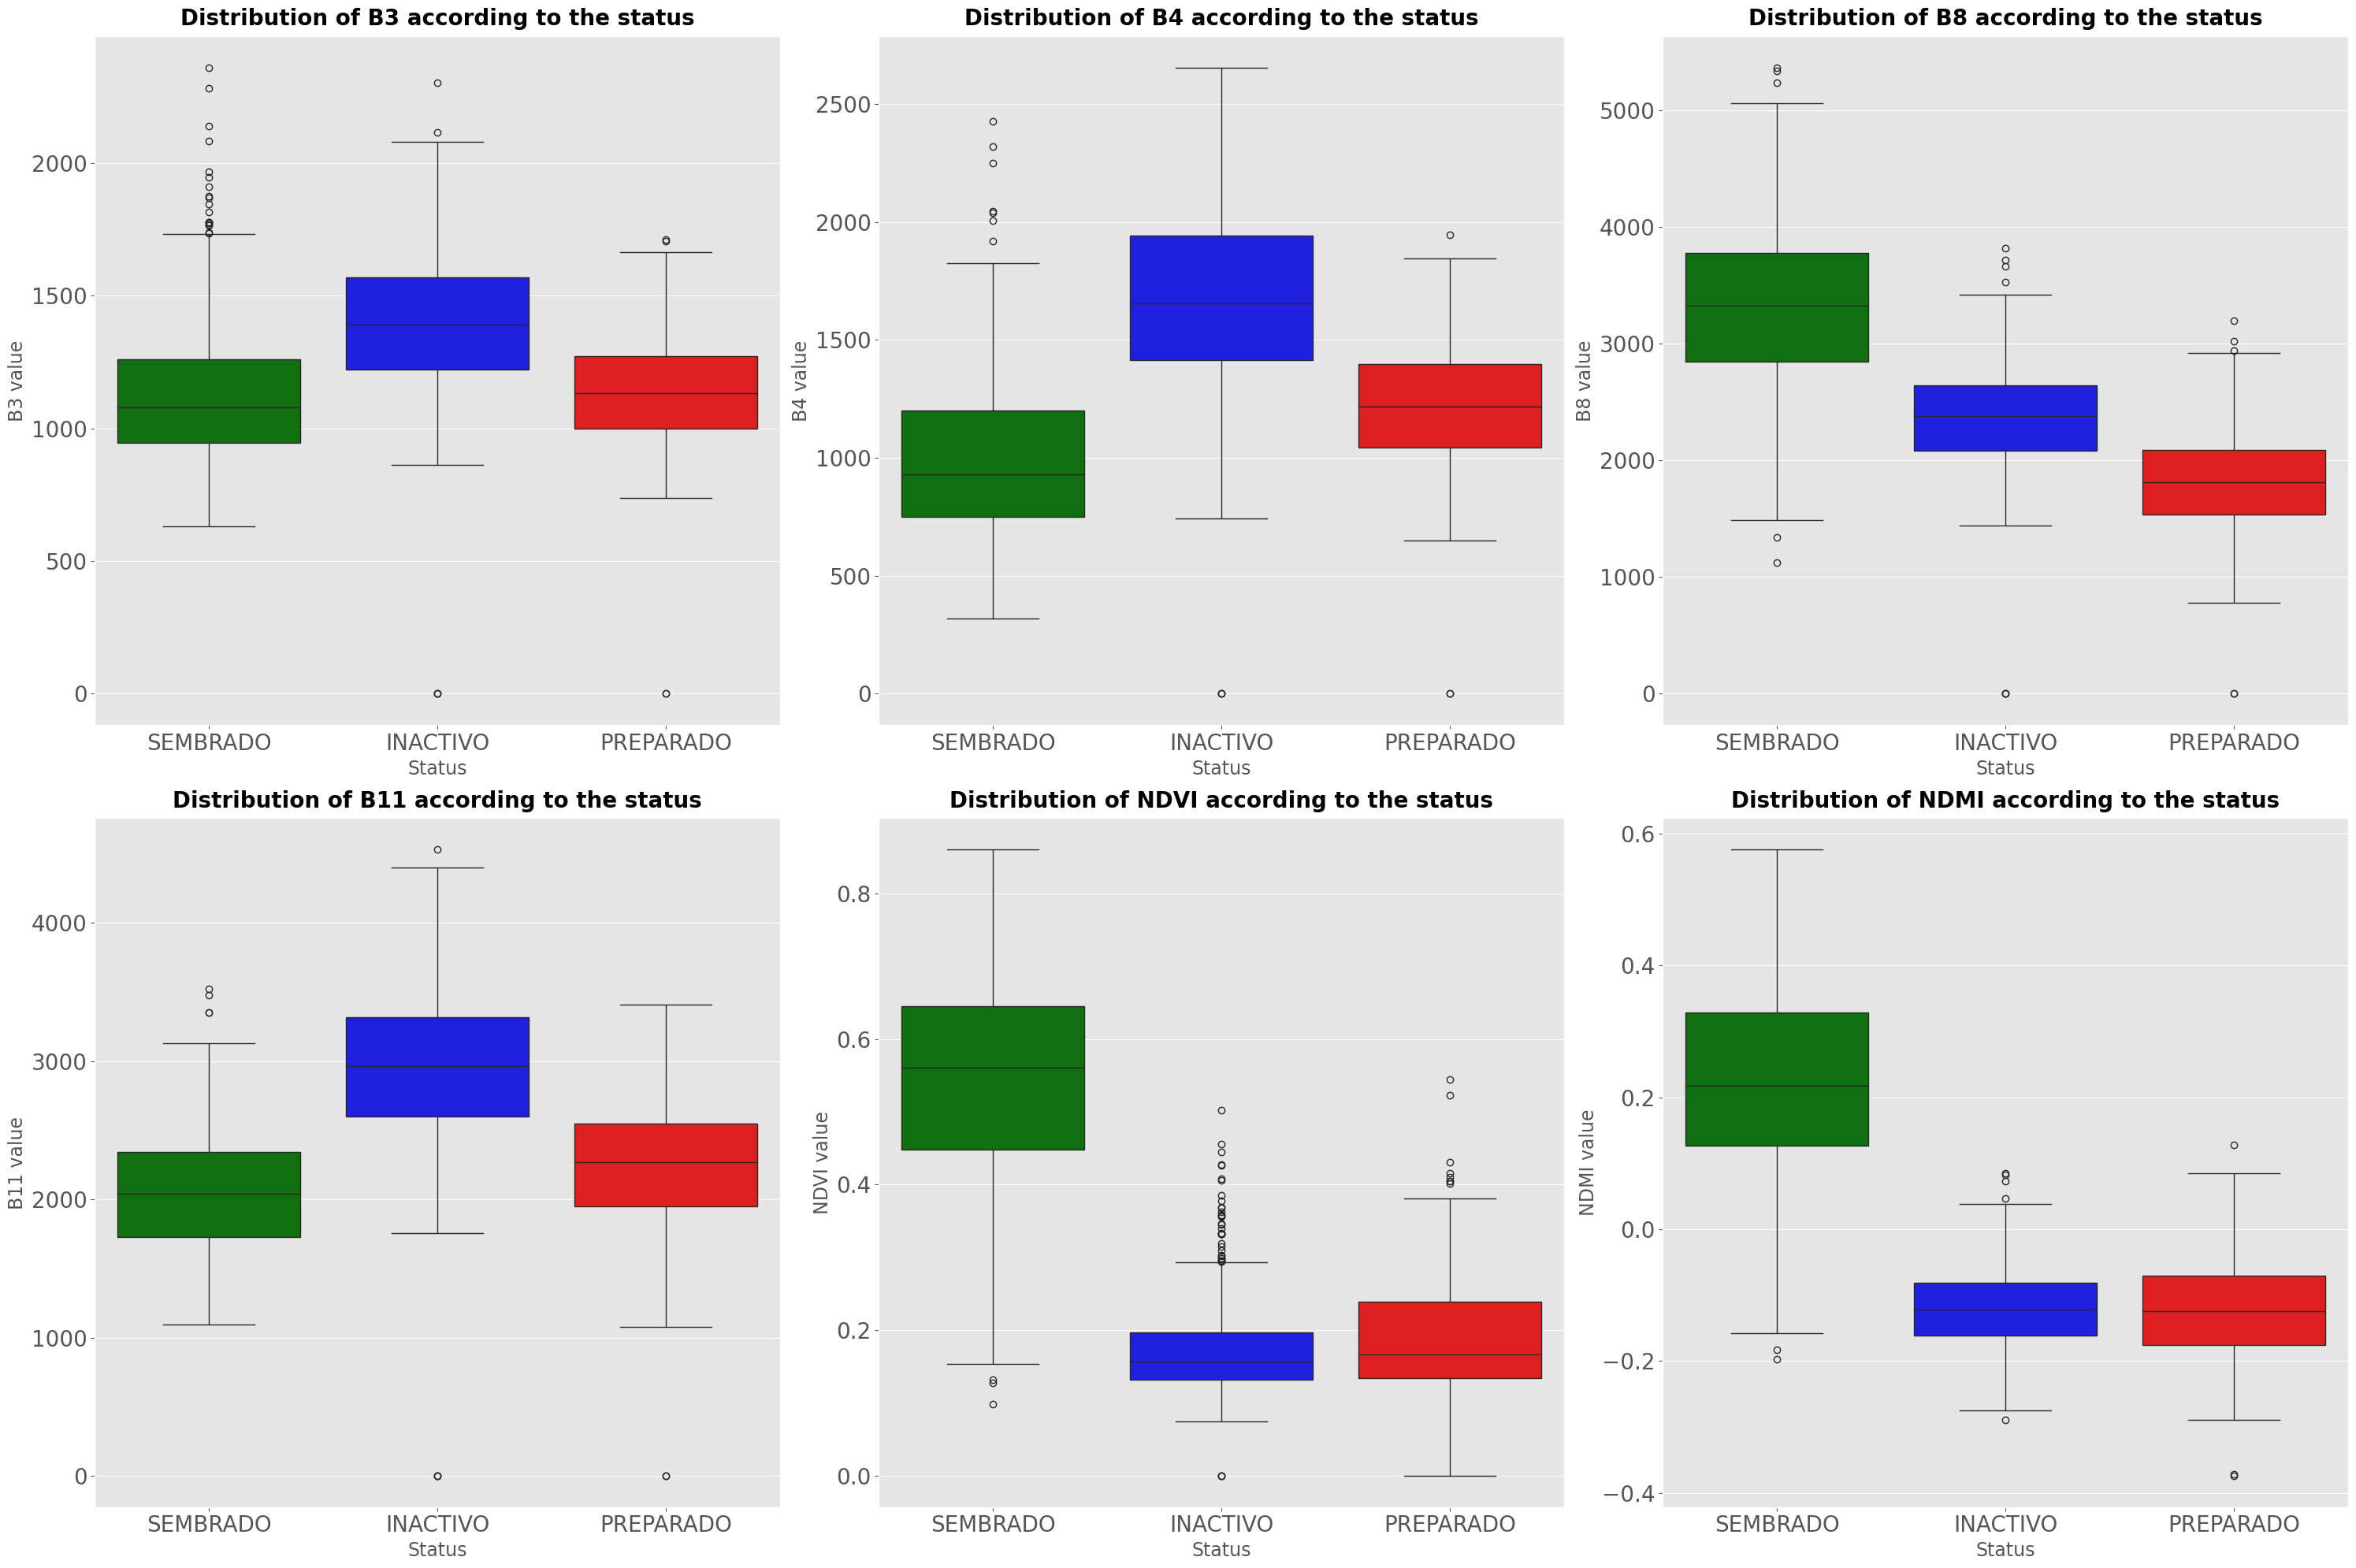

In [9]:
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(30,20))
col_lists = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI']
pal_color = {"SEMBRADO": "green", "INACTIVO": "blue", "PREPARADO": "red"}

for i, param in enumerate(col_lists):
    row = i // 3
    col = i % 3
    sns.boxplot(ax=axes[row, col], x='STATUS', y=param, data=ag_data, palette=pal_color)
    axes[row, col].set_title(f"Distribution of {param} according to the status", fontsize='20', fontweight='bold', pad=10)
    axes[row, col].set_xlabel("Status", fontsize='17')
    axes[row, col].set_ylabel(f"{param} value", fontsize='17')
    axes[row, col].tick_params(labelsize='20')

plt.tight_layout()
plt.show()

After analyzing the distribution of various bands and indices concerning the agricultural activity status in the dataset, significant thresholds with considerable amplitude are noted, suggesting substantial data variability. To address this, a suggestion is made to conduct monthly threshold analysis for a more detailed insight into the relationship between bands/indices and agricultural activity status, potentially revealing hidden patterns and trends that a global analysis might overlook, leading to more accurate and useful project conclusions.

In [10]:
warnings.filterwarnings("ignore", category=UserWarning)

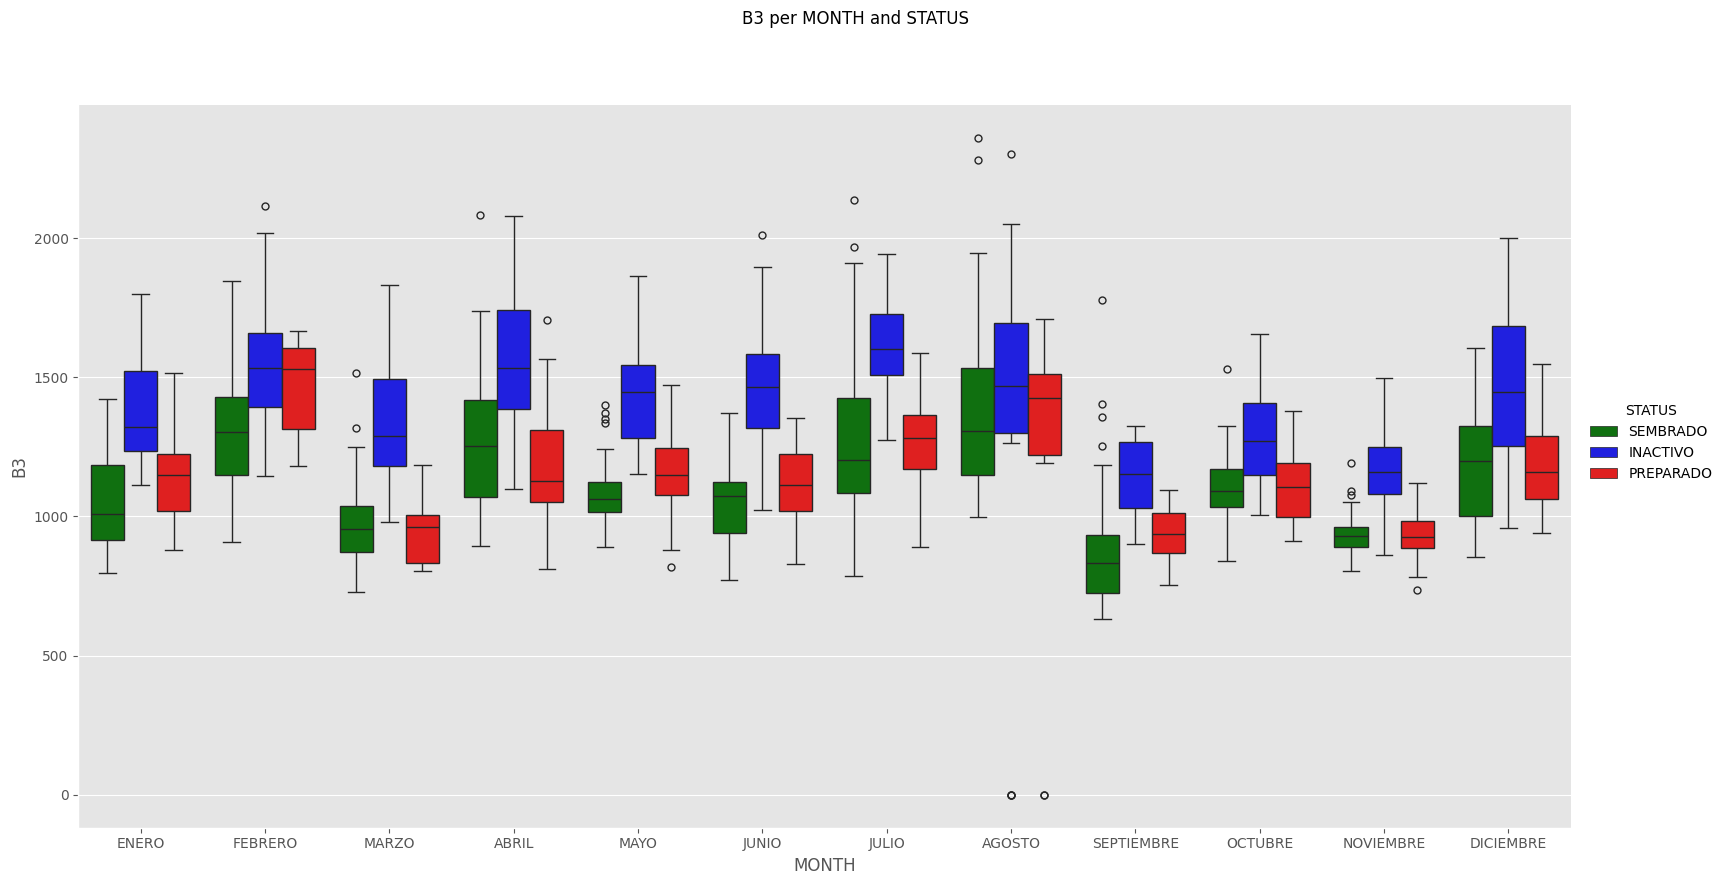

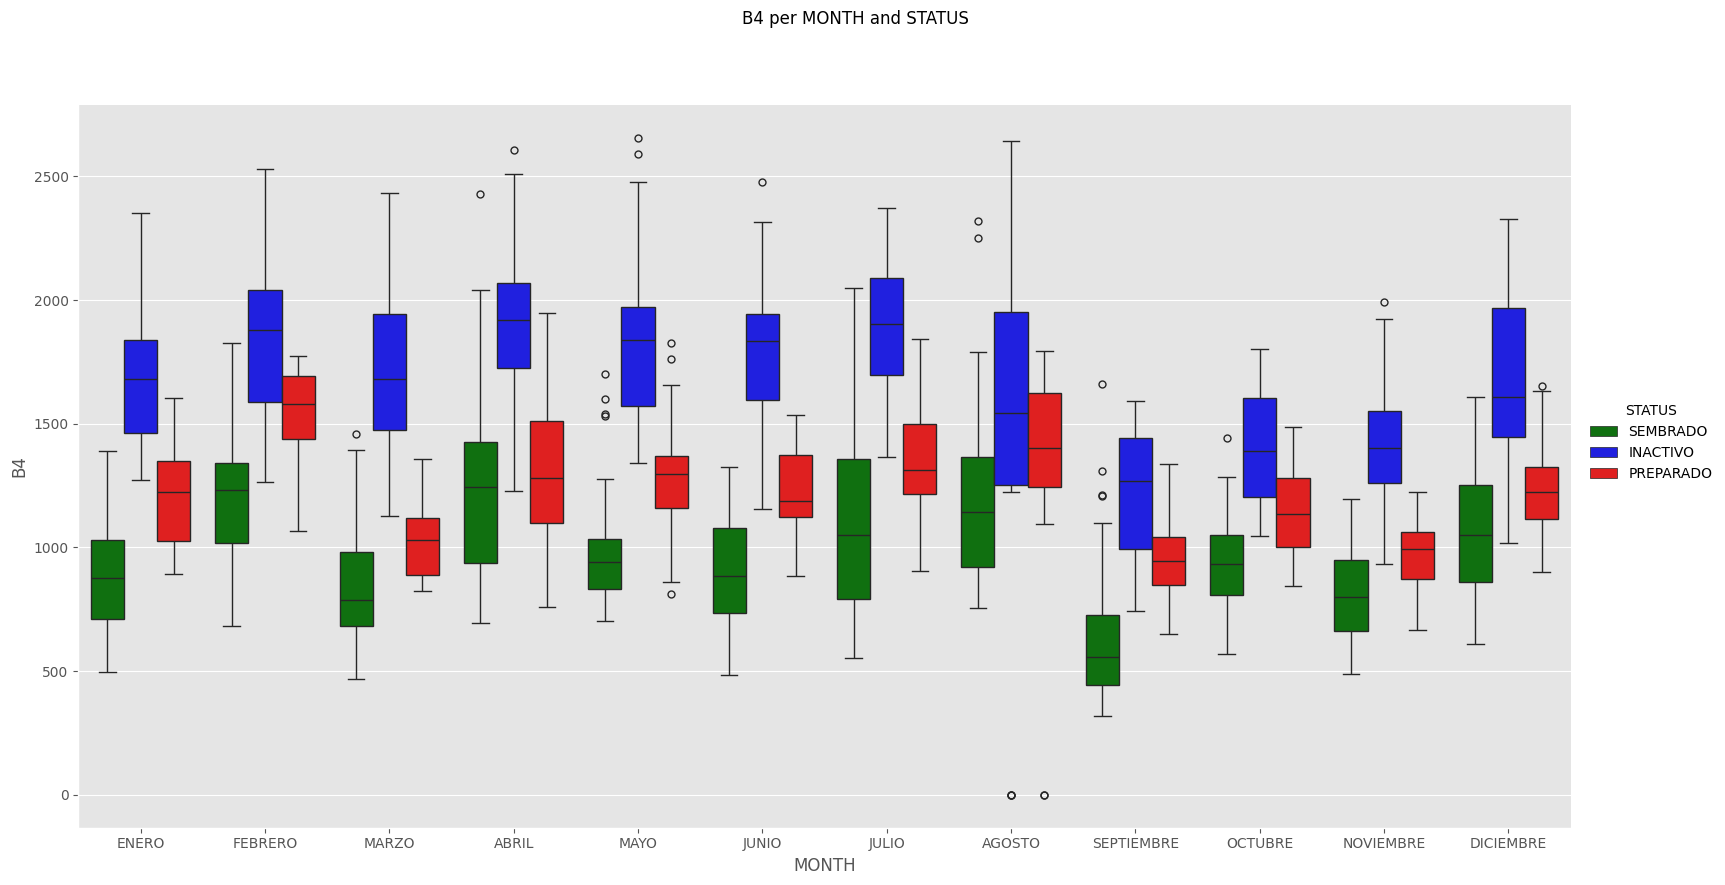

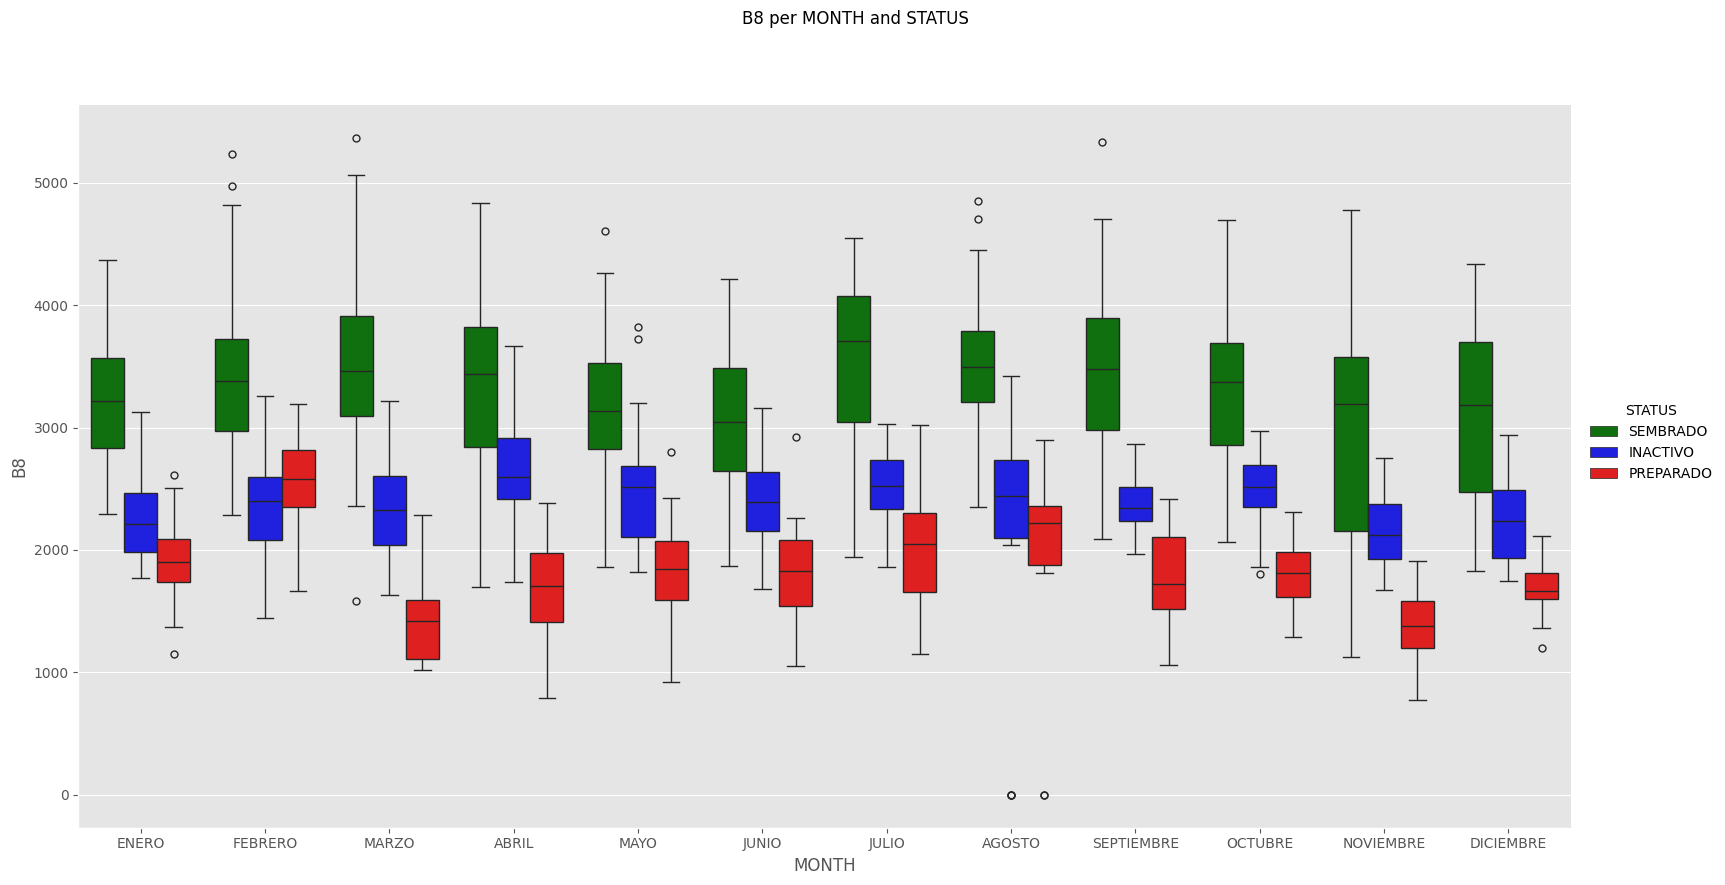

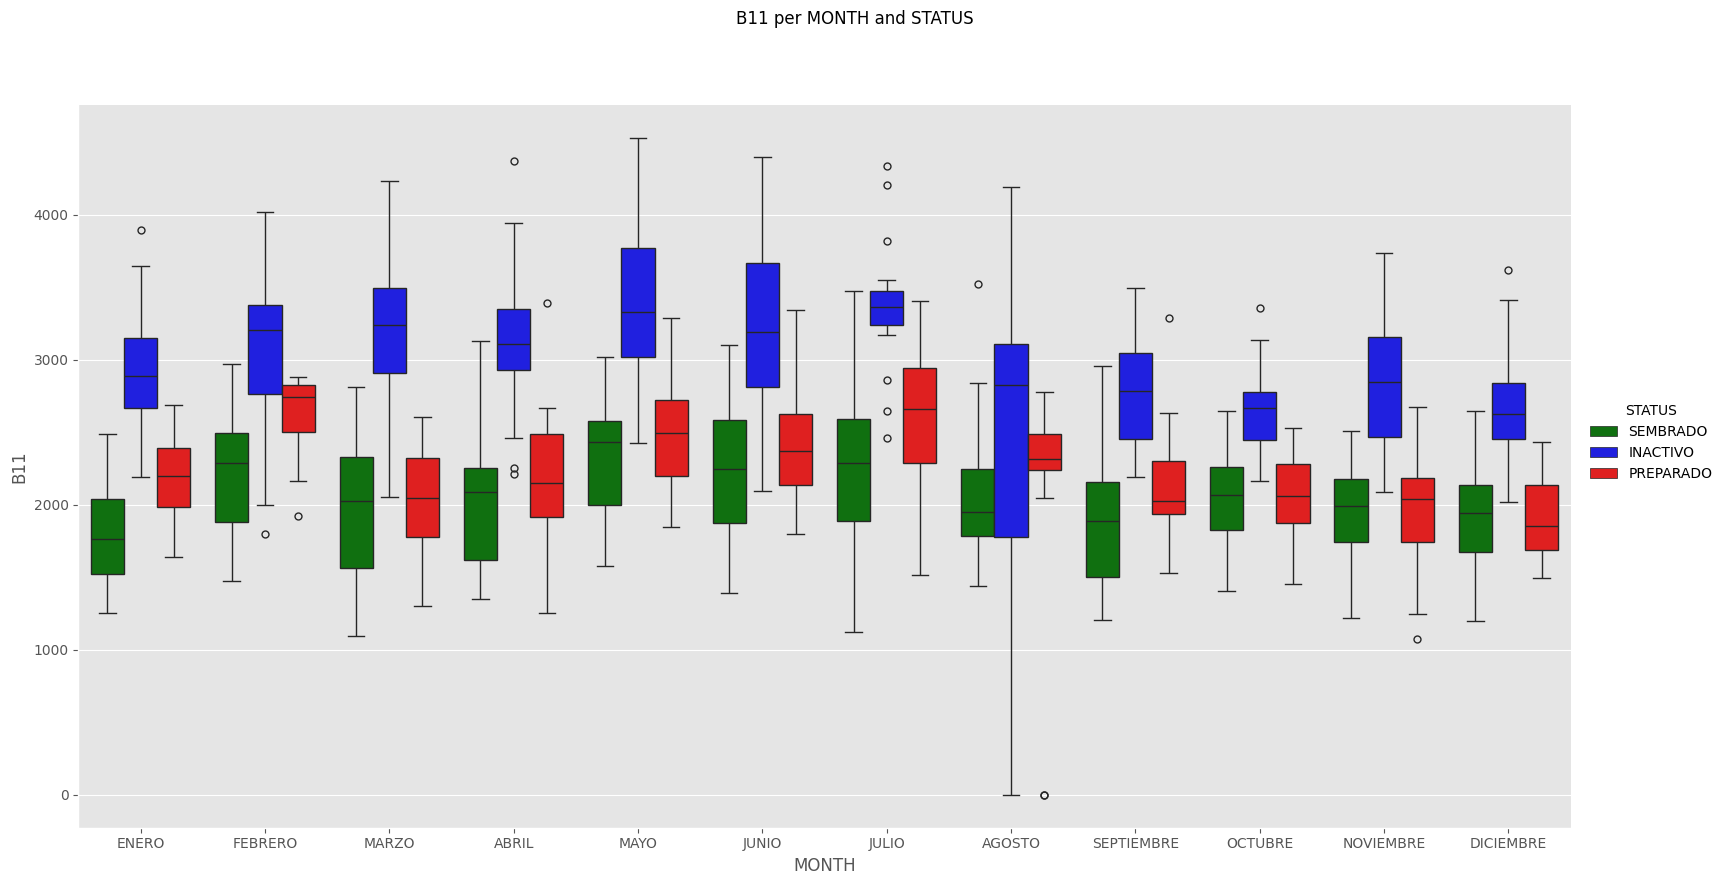

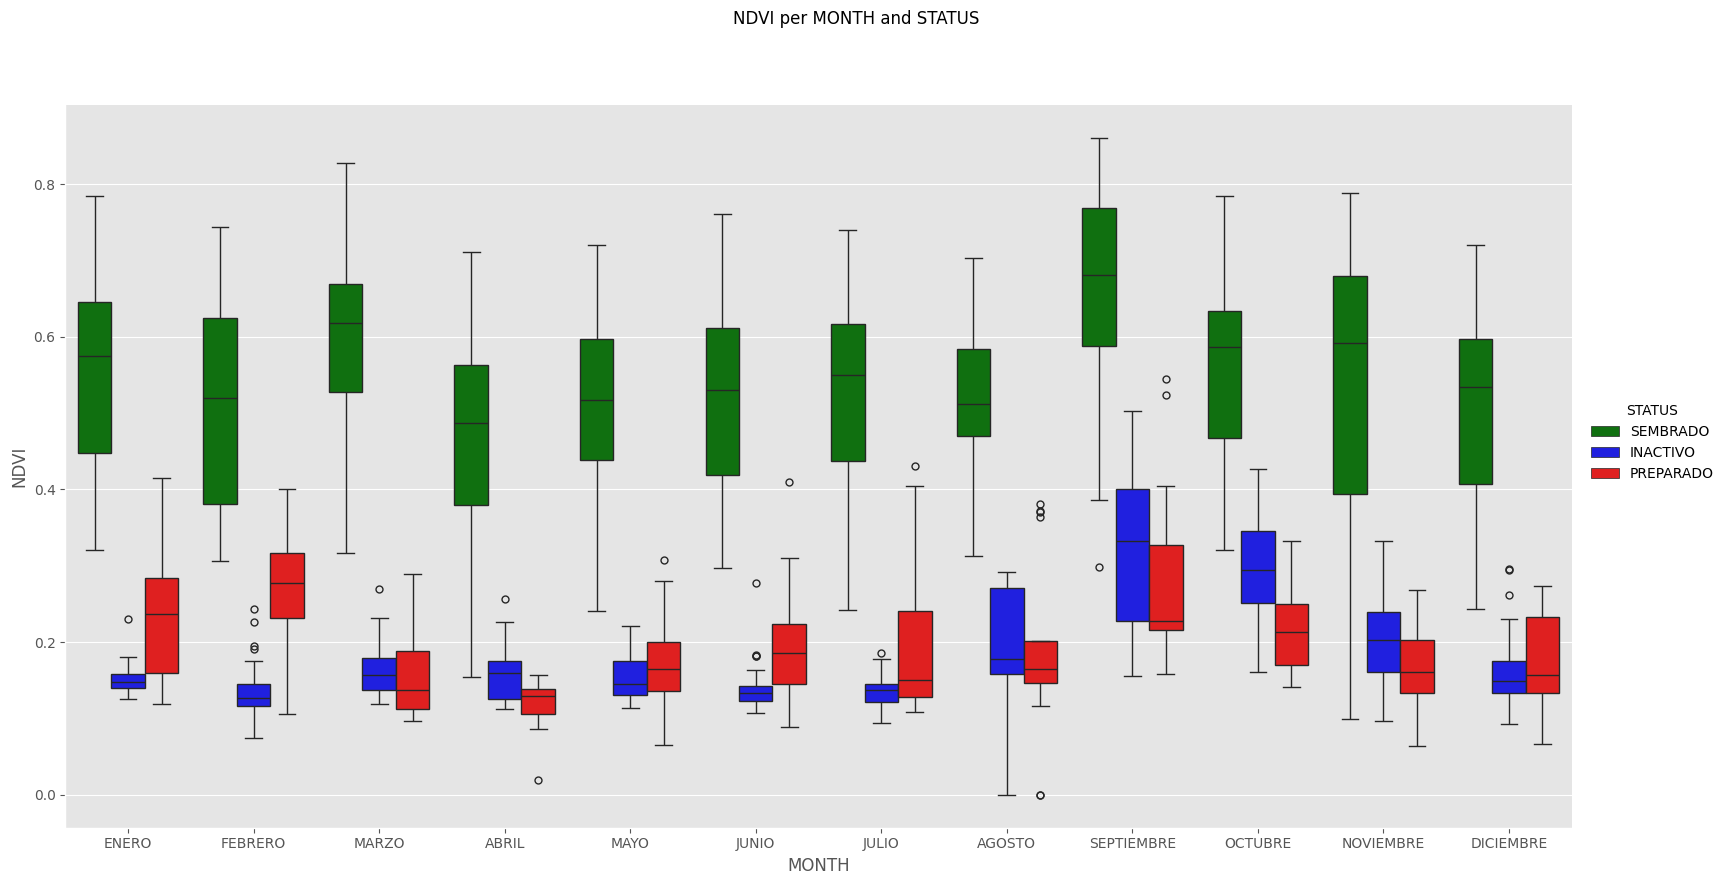

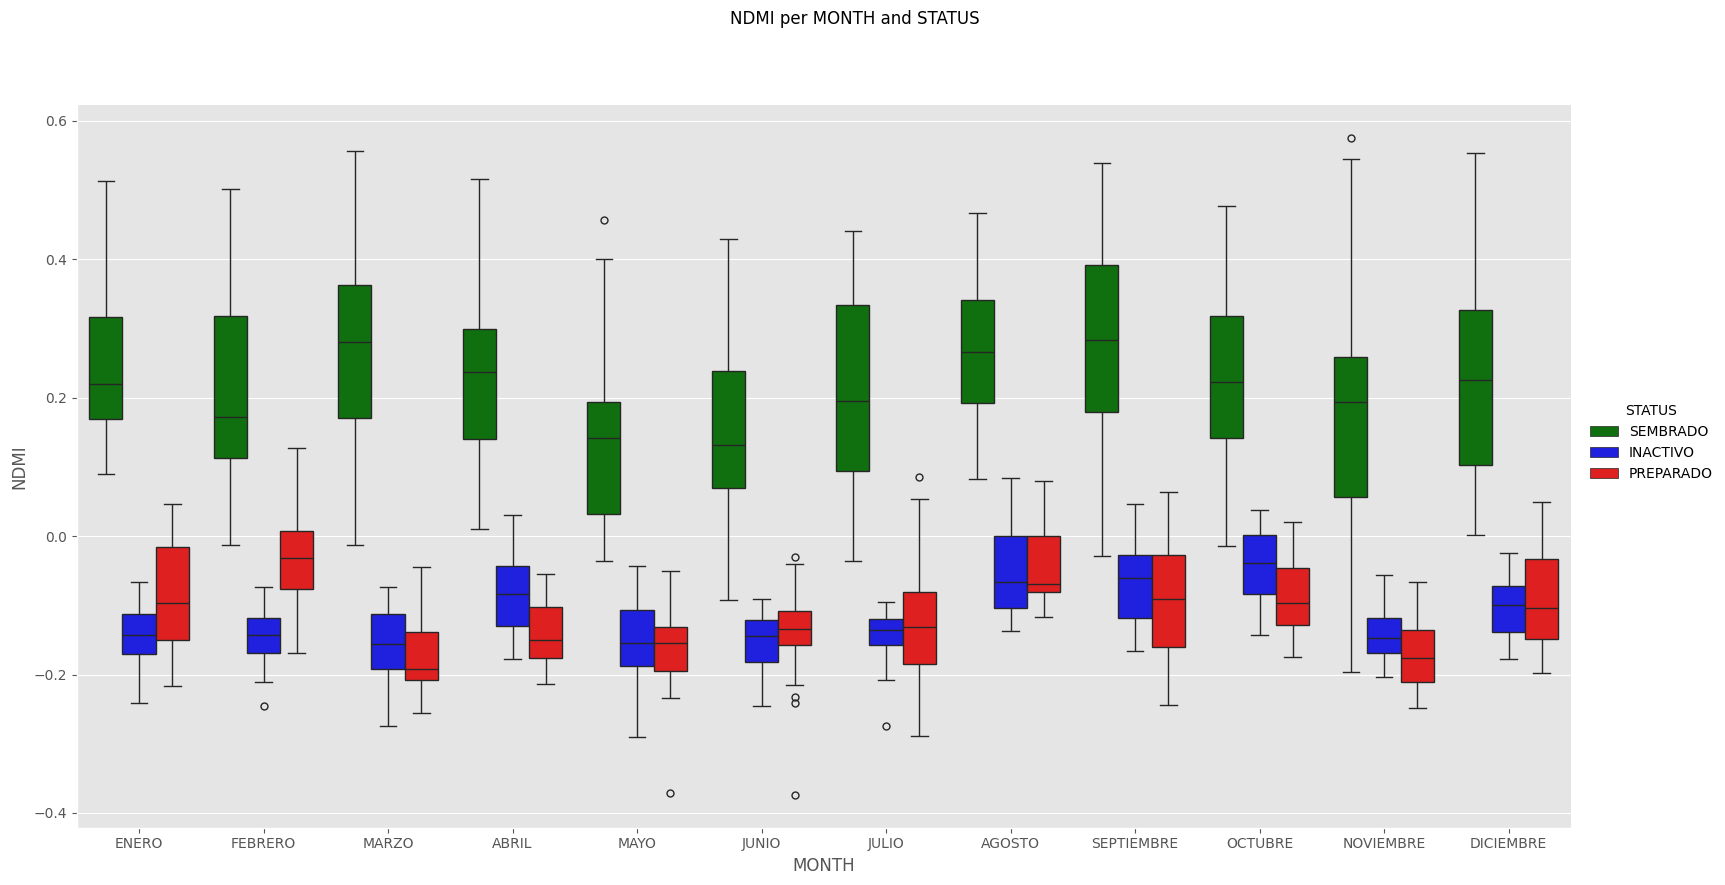

In [11]:
col_lists = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI']
pal_color = {"SEMBRADO": "green", "INACTIVO": "blue", "PREPARADO": "red"}

for par in col_lists:   
    g = sns.catplot(data=ag_data, x='MONTH', y=par, hue='STATUS', kind='box', height=8, aspect=2, palette=pal_color)
    g.fig.suptitle(f"{par} per MONTH and STATUS", y=1.1)
    plt.show()


Analyzing the evolution of plot status over time and identifying the observed trends provides valuable insights into land use patterns and changes. Understanding how plot conditions have developed and recognizing the emerging trends can offer crucial information for decision-making in various fields, such as agriculture, urban planning, and environmental management. Tracking the historical progression of parcel statuses helps in predicting future developments and implementing proactive measures to address potential challenges.

In [12]:
ag_data["MES_ORD"] = pd.to_datetime(ag_data["MES_ORD"])
st_per_month = ag_data.groupby(["MONTH", "STATUS"]).size().unstack()

In [13]:
st_per_month.T

MONTH,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
STATUS,,,,,,,,,,,,
INACTIVO,34,17,42,33,40,16,37,31,31,34,29,22
PREPARADO,25,17,27,27,15,33,27,17,41,24,21,16
SEMBRADO,52,68,42,51,56,57,47,63,39,53,61,69


<Figure size 4000x3000 with 0 Axes>

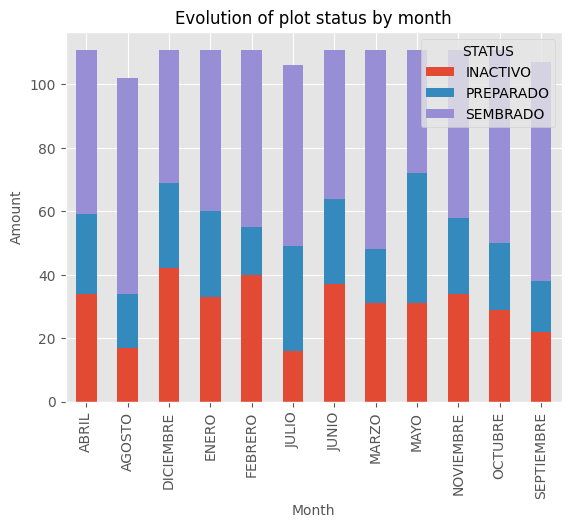

In [14]:
# It will show each state's contribution to the total for a specific month, revealing the relative distribution of states monthly
plt.figure(figsize=(40,30))
st_per_month.plot(kind="bar", stacked=True)
plt.title("Evolution of plot status by month", fontsize='12')
plt.xlabel("Month", fontsize='10')
plt.ylabel("Amount", fontsize='10')
plt.show()

In [15]:
agg_data = ag_data.groupby("MONTH").agg({"PLANTING": "sum", "PREPARATION": "sum"})
agg_data.T

MONTH,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
PLANTING,52,68,42,51,56,57,47,63,39,53,61,69
PREPARATION,25,17,27,27,15,33,27,17,41,24,21,16


<Figure size 3000x4000 with 0 Axes>

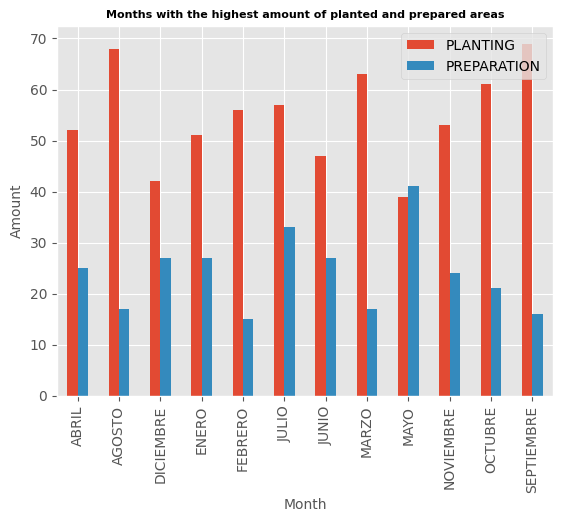

In [16]:
plt.figure(figsize=(30,40))
agg_data.plot(kind="bar")
plt.title("Months with the highest amount of planted and prepared areas", fontsize='8', fontweight='bold')
plt.xlabel("Month", fontsize='10')
plt.ylabel("Amount", fontsize='10')
plt.show()

In [17]:
# Checking dtype columns for corr analysis
ag_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1331
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OBJECTID     1314 non-null   int64         
 1   MONTH        1314 non-null   object        
 2   PLANTING     1314 non-null   int64         
 3   PREPARATION  1314 non-null   int64         
 4   SV           1314 non-null   int64         
 5   POINT_X      1314 non-null   float64       
 6   POINT_Y      1314 non-null   float64       
 7   B3           1314 non-null   float64       
 8   B4           1314 non-null   float64       
 9   B8           1314 non-null   float64       
 10  B11          1314 non-null   float64       
 11  NDVI         1314 non-null   float64       
 12  NDMI         1314 non-null   float64       
 13  STATUS       1314 non-null   object        
 14  HUMIDITY     1314 non-null   object        
 15  TEMPERATUR   1314 non-null   object        
 16  HUM_ORD    

In [18]:
ag_data['MES_ORD'] = ag_data['MES_ORD'].astype('int64')
ag_data.head(5)

,OBJECTID,MONTH,PLANTING,PREPARATION,SV,POINT_X,POINT_Y,B3,B4,B8,B11,NDVI,NDMI,STATUS,HUMIDITY,TEMPERATUR,HUM_ORD,TEMP_ORD,MES_ORD,STATUS_ORD
0,445,ENERO,1,0,0,-100.275529,20.749692,1153.491667,940.541667,4228.416667,1525.058333,0.677746,0.450638,SEMBRADO,BAJA,BAJA,1,3,1,3.0
1,446,ENERO,1,0,0,-100.294862,20.717644,1142.750000,928.266667,4371.650000,1409.091667,0.685861,0.513720,SEMBRADO,BAJA,BAJA,1,3,1,3.0
2,447,ENERO,1,0,0,-100.298974,20.723573,1274.166667,1255.933333,3181.716667,1931.775000,0.405492,0.178517,SEMBRADO,BAJA,BAJA,1,3,1,3.0
3,448,ENERO,1,0,0,-100.300402,20.719290,1304.316667,1252.425000,3591.016667,1926.808333,0.463587,0.250436,SEMBRADO,BAJA,BAJA,1,3,1,3.0
4,449,ENERO,1,0,0,-100.337008,20.741448,1258.975000,1029.850000,4308.633333,1512.483333,0.706512,0.483229,SEMBRADO,BAJA,BAJA,1,3,1,3.0


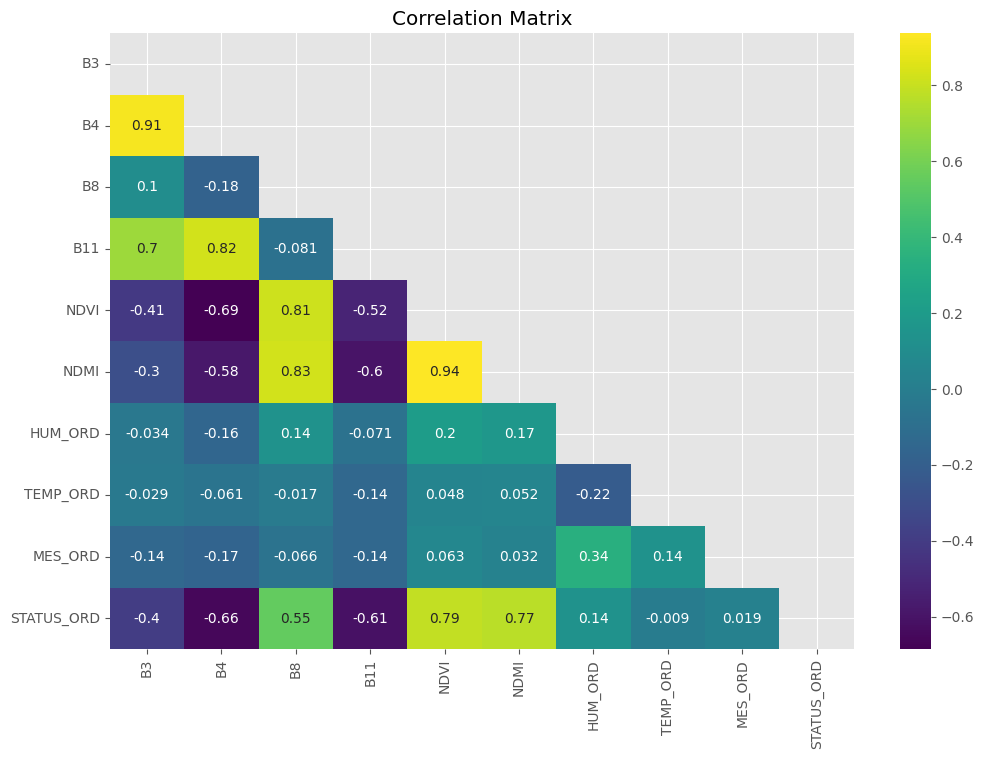

In [19]:
# col to analysis
plt.figure(figsize=(12,8))
c_mat = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI', 'HUM_ORD', 'TEMP_ORD', 'MES_ORD', 'STATUS_ORD']

corr = ag_data[c_mat].corr().round(3)
sns.heatmap(corr, cmap="viridis", annot=True, mask=np.triu(corr))
plt.title('Correlation Matrix')
plt.show()

The agricultural activity status shows a strong positive correlation with NDVI and NDMI vegetation indices, as well as with band B8. This positive correlation implies a potential link between agricultural activity status and vegetation health in crop fields. Conversely, the negative correlation between the variable STATUS_ORD and bands B4 and B11 suggests that higher reflectance values in these wavelengths lead to a decreased likelihood of finding agricultural activity areas (Planted or Prepared).

# Data Normalization

In [20]:
# Statistical Analisys
from scipy.stats import shapiro

data = ag_data
# check -> data.info()
variables = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI', 'STATUS_ORD']

# Shapiro-Wilk proof for each variable
for i in variables:
    data_v = data[i]
    stat, p = shapiro(data_v)
    print('Variable:', i)
    print('Stat proof:', stat)
    print('p-value:', p)
    if p > 0.05:
        print('There is not enough evidence to reject the null hypothesis that the data follow a normal distribution')
    else:
        print('The data do not follow a normal distribution')
    print()

Variable: B3
Stat proof: 0.9681262373924255
p-value: 2.0426358341715063e-16
The data do not follow a normal distribution

Variable: B4
Stat proof: 0.9835611581802368
p-value: 4.638687003954978e-11
The data do not follow a normal distribution

Variable: B8
Stat proof: 0.9897403120994568
p-value: 5.8533679236916214e-08
The data do not follow a normal distribution

Variable: B11
Stat proof: 0.9813620448112488
p-value: 5.505914734554862e-12
The data do not follow a normal distribution

Variable: NDVI
Stat proof: 0.9181392788887024
p-value: 4.434975084706155e-26
The data do not follow a normal distribution

Variable: NDMI
Stat proof: 0.9401917457580566
p-value: 1.3443996000894635e-22
The data do not follow a normal distribution

Variable: STATUS_ORD
Stat proof: 0.7395049929618835
p-value: 3.2085530937645336e-41
The data do not follow a normal distribution



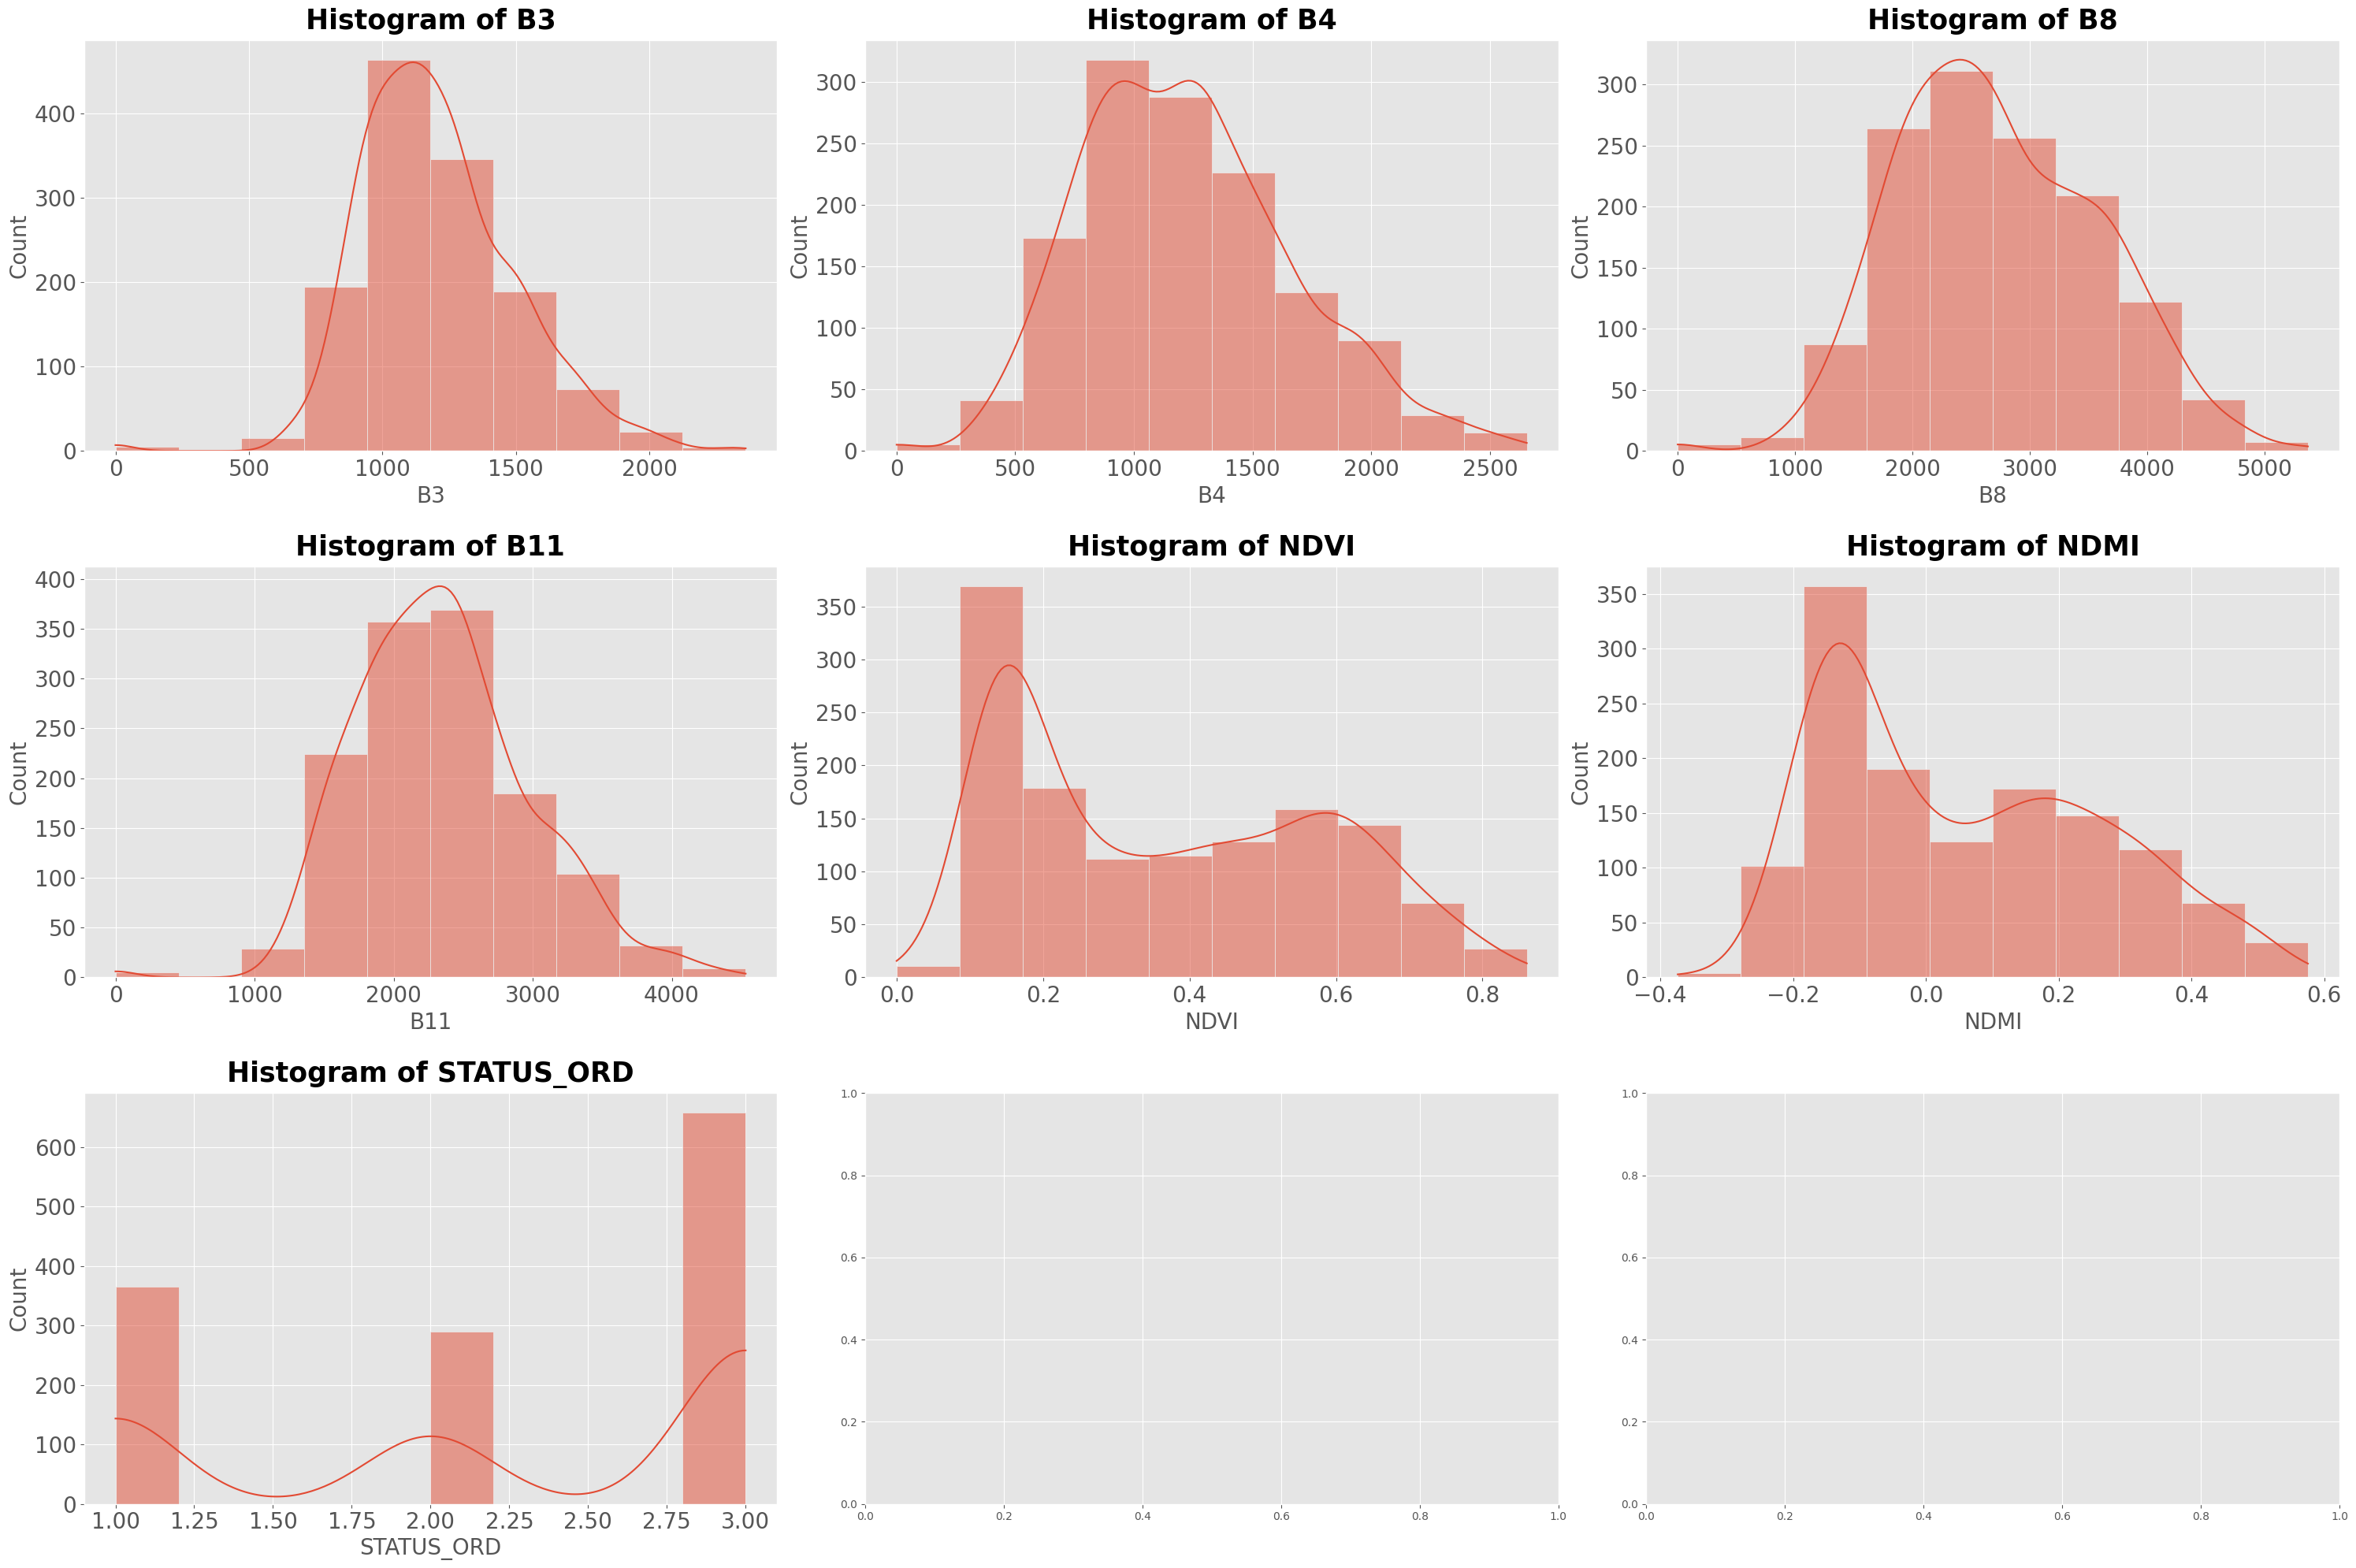

In [21]:
variables = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI', 'STATUS_ORD']

fig, axes = plt.subplots(3, 3, figsize=(30, 20))
for i, param in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.histplot(data=data[param],
                 ax=axes[row, col],
                 bins=10,
                 cbar=True,
                 kde=True)
    axes[row, col].set_title(f"Histogram of {param}", fontsize='25', fontweight='bold', pad=10)
    axes[row, col].set_xlabel(f"{param}", fontsize='20')
    axes[row, col].set_ylabel("Count", fontsize='20')
    axes[row, col].tick_params(labelsize='20')

plt.tight_layout(h_pad=2.5)
plt.show()



In [41]:
# Removing outliers for accesory model
def rem_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

In [42]:
col_rem = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI', 'STATUS_ORD']

data_cleaned = rem_outliers(data, col_rem)

## 3.- Model

In [43]:
var_x = ['B3', 'B4', 'B8', 'B11', 'NDVI', 'NDMI']
X = data[var_x]
X_1 = data_cleaned[var_x]
y = data['STATUS_ORD']
y_1 = data_cleaned['STATUS_ORD']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report


In [25]:
X.head()

,B3,B4,B8,B11,NDVI,NDMI
0,1153.491667,940.541667,4228.416667,1525.058333,0.677746,0.450638
1,1142.750000,928.266667,4371.650000,1409.091667,0.685861,0.513720
2,1274.166667,1255.933333,3181.716667,1931.775000,0.405492,0.178517
3,1304.316667,1252.425000,3591.016667,1926.808333,0.463587,0.250436
4,1258.975000,1029.850000,4308.633333,1512.483333,0.706512,0.483229


In [45]:
# define the scaler
sc = PowerTransformer()
X_copy = X.copy()
X_1_copy = X_1.copy()
# fit and transform the train set
X_copy.loc[:, 'NDVI'] = sc.fit_transform(X_copy[['NDVI']])
X_copy.loc[:, 'NDMI'] = sc.fit_transform(X_copy[['NDMI']])
X_1_copy.loc[:, 'NDVI'] = sc.fit_transform(X_1_copy[['NDVI']])
X_1_copy.loc[:, 'NDMI'] = sc.fit_transform(X_1_copy[['NDMI']])

In [27]:
X_copy.head()

,B3,B4,B8,B11,NDVI,NDMI
0,1153.491667,940.541667,4228.416667,1525.058333,1.359946,1.659454
1,1142.750000,928.266667,4371.650000,1409.091667,1.385455,1.837748
2,1274.166667,1255.933333,3181.716667,1931.775000,0.334754,0.713208
3,1304.316667,1252.425000,3591.016667,1926.808333,0.585298,0.996437
4,1258.975000,1029.850000,4308.633333,1512.483333,1.449282,1.753144


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.3, random_state=42)

In [46]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_copy, y_1, test_size=0.3, random_state=42)

In [34]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Print the decision tree 
tree_text = export_text(model, feature_names=var_x)
print(tree_text)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model precision: {:.2f}%'.format(accuracy * 100))

|--- NDMI <= -0.11
|   |--- B8 <= 1855.19
|   |   |--- NDVI <= -0.32
|   |   |   |--- class: 2.0
|   |   |--- NDVI >  -0.32
|   |   |   |--- class: 3.0
|   |--- B8 >  1855.19
|   |   |--- B4 <= 1776.28
|   |   |   |--- class: 1.0
|   |   |--- B4 >  1776.28
|   |   |   |--- class: 1.0
|--- NDMI >  -0.11
|   |--- NDMI <= 0.15
|   |   |--- NDVI <= -0.15
|   |   |   |--- class: 2.0
|   |   |--- NDVI >  -0.15
|   |   |   |--- class: 3.0
|   |--- NDMI >  0.15
|   |   |--- NDVI <= -0.19
|   |   |   |--- class: 1.0
|   |   |--- NDVI >  -0.19
|   |   |   |--- class: 3.0

Model precision: 80.51%


In [35]:
# Without normalization
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
model1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model1.fit(X_tr, y_tr)

# Print the decision tree 
tree_text1 = export_text(model1, feature_names=var_x)
print(tree_text1)

y_pred1 = model1.predict(X_te)
accuracy1 = accuracy_score(y_te, y_pred1)
print('Model precision: {:.2f}%'.format(accuracy1 * 100))

|--- NDMI <= 0.00
|   |--- B8 <= 1855.19
|   |   |--- NDVI <= 0.27
|   |   |   |--- class: 2.0
|   |   |--- NDVI >  0.27
|   |   |   |--- class: 3.0
|   |--- B8 >  1855.19
|   |   |--- B4 <= 1776.28
|   |   |   |--- class: 1.0
|   |   |--- B4 >  1776.28
|   |   |   |--- class: 1.0
|--- NDMI >  0.00
|   |--- NDMI <= 0.05
|   |   |--- NDVI <= 0.30
|   |   |   |--- class: 2.0
|   |   |--- NDVI >  0.30
|   |   |   |--- class: 3.0
|   |--- NDMI >  0.05
|   |   |--- NDVI <= 0.30
|   |   |   |--- class: 1.0
|   |   |--- NDVI >  0.30
|   |   |   |--- class: 3.0

Model precision: 80.51%


In [48]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
model2.fit(X_1_train, y_1_train)

# Print the decision tree 
tree_text2 = export_text(model2, feature_names=var_x)
print(tree_text2)

y_pred2 = model2.predict(X_1_test)
accuracy2 = accuracy_score(y_1_test, y_pred2)
print('Model precision: {:.2f}%'.format(accuracy2 * 100))

|--- NDMI <= -0.04
|   |--- B11 <= 2641.56
|   |   |--- B8 <= 2099.25
|   |   |   |--- class: 2.0
|   |   |--- B8 >  2099.25
|   |   |   |--- class: 1.0
|   |--- B11 >  2641.56
|   |   |--- B4 <= 1846.07
|   |   |   |--- class: 1.0
|   |   |--- B4 >  1846.07
|   |   |   |--- class: 1.0
|--- NDMI >  -0.04
|   |--- NDMI <= 0.12
|   |   |--- NDVI <= -0.20
|   |   |   |--- class: 2.0
|   |   |--- NDVI >  -0.20
|   |   |   |--- class: 3.0
|   |--- NDMI >  0.12
|   |   |--- NDVI <= -0.38
|   |   |   |--- class: 1.0
|   |   |--- NDVI >  -0.38
|   |   |   |--- class: 3.0

Model precision: 81.89%


In [38]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.64      0.84      0.73       110
         2.0       0.71      0.49      0.58        90
         3.0       0.96      0.93      0.95       195

    accuracy                           0.81       395
   macro avg       0.77      0.75      0.75       395
weighted avg       0.81      0.81      0.80       395



In [40]:
report1 = classification_report(y_te, y_pred1)
print(report1)

              precision    recall  f1-score   support

         1.0       0.64      0.84      0.73       110
         2.0       0.71      0.49      0.58        90
         3.0       0.96      0.93      0.95       195

    accuracy                           0.81       395
   macro avg       0.77      0.75      0.75       395
weighted avg       0.81      0.81      0.80       395



In [49]:
report2 = classification_report(y_1_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

         1.0       0.69      0.76      0.72       108
         2.0       0.65      0.70      0.67        79
         3.0       0.98      0.90      0.94       194

    accuracy                           0.82       381
   macro avg       0.78      0.79      0.78       381
weighted avg       0.83      0.82      0.82       381



## 4.- Conclusion

The results report shows evaluation metrics for each class and the overall model performance. Class 1 had 64% precision, class 2 had 71%, and class 3 had the highest precision at 96%. The model's weighted average precision was 81%, indicating good overall prediction ability. Class 3 also had the highest F1-score at 0.95, signifying high precision and recall for that class. In removing outliers from the data, better indicators of the model are displayed overall, though not very different.